In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

import matplotlib.patches as patches
import matplotlib.path as path

import pandas as pd
import os

In [2]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

使用`density`参数，设置是否将所有bin的面积和标准化到1

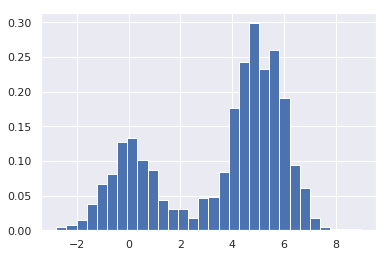

In [3]:
hist = plt.hist(x, bins=30, density=True)

hist函数可以返回三个量：
- density: 一个数组，依次包含每个bin的频率
- bins: 每个bin的起始位置
- patch

In [4]:
density, bins, _patches = hist
bins

array([-2.793085  , -2.40136208, -2.00963915, -1.61791623, -1.22619331,
       -0.83447038, -0.44274746, -0.05102454,  0.34069839,  0.73242131,
        1.12414423,  1.51586716,  1.90759008,  2.29931301,  2.69103593,
        3.08275885,  3.47448178,  3.8662047 ,  4.25792762,  4.64965055,
        5.04137347,  5.43309639,  5.82481932,  6.21654224,  6.60826516,
        6.99998809,  7.39171101,  7.78343393,  8.17515686,  8.56687978,
        8.9586027 ])

In [5]:
density

array([0.00510565, 0.00765847, 0.01531695, 0.03829237, 0.06637345,
       0.08169039, 0.12764124, 0.13274689, 0.10211299, 0.08679604,
       0.04339802, 0.0306339 , 0.0306339 , 0.01786977, 0.04595085,
       0.04850367, 0.08424322, 0.17614491, 0.24251836, 0.2986805 ,
       0.23230706, 0.26038813, 0.19146186, 0.09445452, 0.0612678 ,
       0.01786977, 0.00510565, 0.00255282, 0.00255282, 0.00255282])

In [6]:
_patches

<a list of 30 Patch objects>

In [7]:
widths = bins[1:] - bins[:-1]
widths

array([0.39172292, 0.39172292, 0.39172292, 0.39172292, 0.39172292,
       0.39172292, 0.39172292, 0.39172292, 0.39172292, 0.39172292,
       0.39172292, 0.39172292, 0.39172292, 0.39172292, 0.39172292,
       0.39172292, 0.39172292, 0.39172292, 0.39172292, 0.39172292,
       0.39172292, 0.39172292, 0.39172292, 0.39172292, 0.39172292,
       0.39172292, 0.39172292, 0.39172292, 0.39172292, 0.39172292])

In [8]:
(density * widths).sum()  # 概率密度 x 30个固定宽度的区间，得到概率密度下的面积

1.0

In [9]:
hist

(array([0.00510565, 0.00765847, 0.01531695, 0.03829237, 0.06637345,
        0.08169039, 0.12764124, 0.13274689, 0.10211299, 0.08679604,
        0.04339802, 0.0306339 , 0.0306339 , 0.01786977, 0.04595085,
        0.04850367, 0.08424322, 0.17614491, 0.24251836, 0.2986805 ,
        0.23230706, 0.26038813, 0.19146186, 0.09445452, 0.0612678 ,
        0.01786977, 0.00510565, 0.00255282, 0.00255282, 0.00255282]),
 array([-2.793085  , -2.40136208, -2.00963915, -1.61791623, -1.22619331,
        -0.83447038, -0.44274746, -0.05102454,  0.34069839,  0.73242131,
         1.12414423,  1.51586716,  1.90759008,  2.29931301,  2.69103593,
         3.08275885,  3.47448178,  3.8662047 ,  4.25792762,  4.64965055,
         5.04137347,  5.43309639,  5.82481932,  6.21654224,  6.60826516,
         6.99998809,  7.39171101,  7.78343393,  8.17515686,  8.56687978,
         8.9586027 ]),
 <a list of 30 Patch objects>)

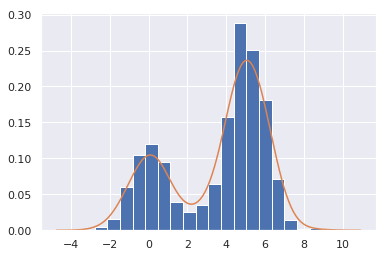

In [10]:
plt.hist(x, bins=18, density=True)
sns.kdeplot(x) # 画出拟合的概率密度函数图像

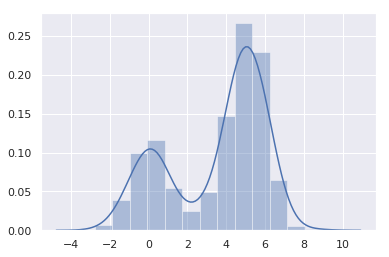

In [11]:
sns.distplot(x)

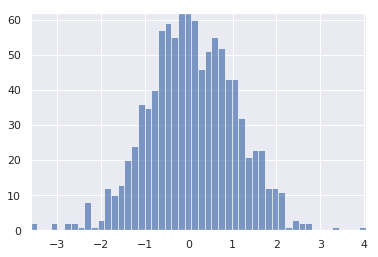

In [12]:
fig, ax = plt.subplots()

# Fixing random state for reproducibility
np.random.seed(19680801)


# histogram our data with numpy

data = np.random.randn(1000)
n, bins = np.histogram(data, 50)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n


# we need a (numrects x numsides x 2) numpy array for the path helper
# function to build a compound path
XY = np.array([[left, left, right, right], [bottom, top, top, bottom]]).T

# get the Path object
barpath = path.Path.make_compound_path_from_polys(XY)

# make a patch out of it
# https://matplotlib.org/api/_as_gen/matplotlib.patches.Patch.html
patch = patches.PathPatch(barpath, alpha=0.7)
ax.add_patch(patch)

# update the view limits
ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

plt.show()

#### setting `bins` and `xticks`

In [13]:
def read_read_counts(read_counts_path):
    """
    read counts file comes from the output of 'fastagz_to_counts.py'
    :param read_counts_path:
    :return:
    """
    read_counts = pd.read_csv(read_counts_path, sep='\t', header=None)
    read_counts.rename(columns={0: 'sgid', 1: 'read_counts'}, inplace=True)
    print(read_counts.head())
    read_counts['sgid'] = read_counts['sgid'].apply(lambda x: x.split(' ')[0])
    print('file path: ', read_counts_path, ';', read_counts.shape)
    return read_counts


def plot_read_counts_hist(read_counts, lib_name, result_dir, set_bins, set_xticks):
    """
    plot Hist of read counts to see the distribution of read counts of all sgRNAs in this sample
    :param read_counts: a DataFrame which contains read counts of a single sample
    :param lib_name: the name of figure file
    :param result_dir:
    :param set_bins: setting the interval of each bin, [0, 10, 20, 30] means there has 3 bins and the interval is 10
    :param set_xticks: setting the scale shows on the x coordinate axis
    :return:
    """
    fig, ax = plt.subplots(figsize=(8, 6))
    if set_bins:
        bins = np.arange(read_counts['read_counts'].min() - 1, read_counts['read_counts'].max() + 1, 25)
        # print('bins: ', bins)
        ax.hist(read_counts['read_counts'], bins=bins)
    else:
        ax.hist(read_counts['read_counts'])
    if set_xticks:
        xticks = np.arange(read_counts['read_counts'].min(), read_counts['read_counts'].max() + 1, 200)
        ax.set_xticks(xticks)
    ax.set_title('The hist of read counts in sublibrary {}'.format(lib_name))
    ax.set_xlabel('read counts', fontsize=12)
    ax.set_ylabel('the number of sgRNA', fontsize=12)
    fig.tight_layout()
    fig.savefig(os.path.join(result_dir, 'sgRNA_read_counts_hist_{}.png'.format(lib_name)), dpi=300)


In [14]:
read_counts = read_read_counts('./demo_data/1_9-1_sublibrary_1.fa.counts')

                             sgid  read_counts
0  lib1-sg-AAR2-A-1 RBP-cytoplasm          351
1  lib1-sg-AAR2-A-2 RBP-cytoplasm          125
2  lib1-sg-AAR2-A-3 RBP-cytoplasm          161
3  lib1-sg-AAR2-A-4 RBP-cytoplasm          145
4  lib1-sg-AAR2-A-5 RBP-cytoplasm           80
file path:  ./demo_data/1_9-1_sublibrary_1.fa.counts ; (5285, 2)


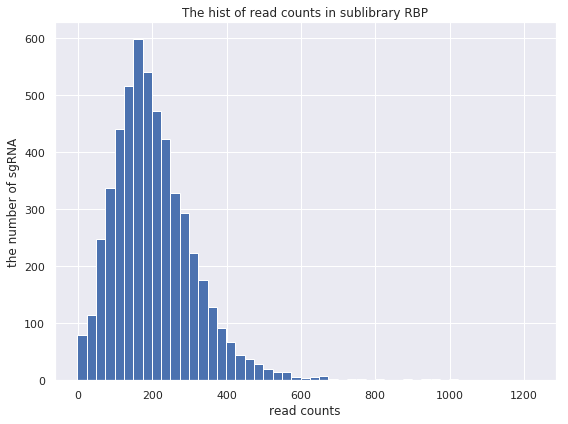

In [15]:
plot_read_counts_hist(read_counts, lib_name='RBP', result_dir='.', set_bins=True, set_xticks=True)

#### multiple subplots

In [16]:
loc = [(i, j) for i in range(2) for j in range(3)]
i2loc = {i: loc[i] for i in range(6)}
i2loc

{0: (0, 0), 1: (0, 1), 2: (0, 2), 3: (1, 0), 4: (1, 1), 5: (1, 2)}

                             sgid  read_counts
0  lib1-sg-AAR2-A-1 RBP-cytoplasm          351
1  lib1-sg-AAR2-A-2 RBP-cytoplasm          125
2  lib1-sg-AAR2-A-3 RBP-cytoplasm          161
3  lib1-sg-AAR2-A-4 RBP-cytoplasm          145
4  lib1-sg-AAR2-A-5 RBP-cytoplasm           80
file path:  ./demo_data/1_9-1_sublibrary_1.fa.counts ; (5285, 2)
                             sgid  read_counts
0  lib1-sg-AAR2-I-1 RBP-cytoplasm          103
1  lib1-sg-AAR2-I-2 RBP-cytoplasm          111
2  lib1-sg-AAR2-I-3 RBP-cytoplasm          265
3  lib1-sg-AAR2-I-4 RBP-cytoplasm          198
4  lib1-sg-AAR2-I-5 RBP-cytoplasm          309
file path:  ./demo_data/1_9-2_sublibrary_2.fa.counts ; (5279, 2)
                              sgid  read_counts
0  lib1-sg-AAR2-KO-1 RBP-cytoplasm          179
1  lib1-sg-AAR2-KO-2 RBP-cytoplasm           79
2  lib1-sg-AAR2-KO-3 RBP-cytoplasm          241
3  lib1-sg-AAR2-KO-4 RBP-cytoplasm          142
4  lib1-sg-AAR2-KO-5 RBP-cytoplasm          114
file path:  ./demo

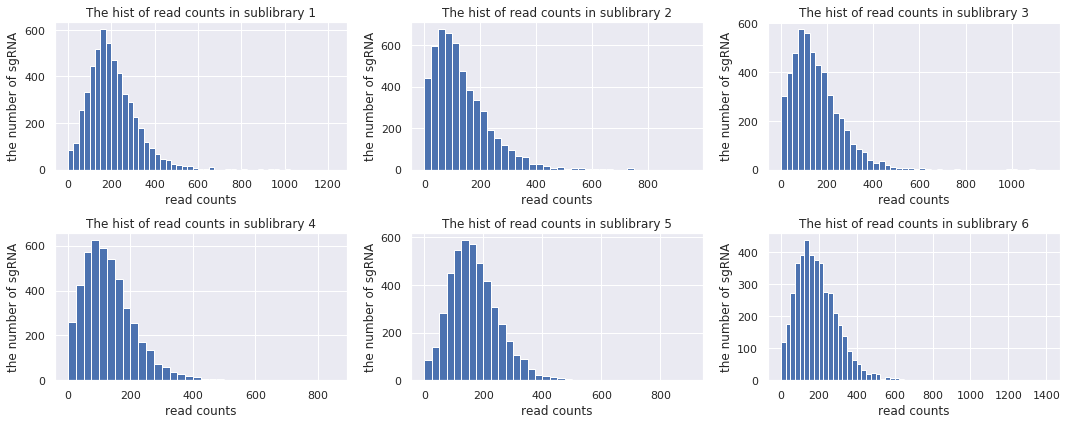

In [17]:
fig, ax = plt.subplots(2, 3, figsize=(15, 6))
for i,j in i2loc.items():
    read_counts = read_read_counts('./demo_data/1_9-{}_sublibrary_{}.fa.counts'.format(i+1, i+1))
    bins = np.arange(0, read_counts['read_counts'].max() + 1, 25)
    xticks = np.arange(0, read_counts['read_counts'].max() + 1, 200)
    ax[j].hist(read_counts['read_counts'], bins=bins)
    ax[j].set_xticks(xticks)
    ax[j].set_title('The hist of read counts in sublibrary {}'.format(i+1))
# fig.title('The hist of read counts in sublibrary {}'.format(1))
    ax[j].set_xlabel('read counts', fontsize=12)
    ax[j].set_ylabel('the number of sgRNA', fontsize=12)
plt.tight_layout()
plt.savefig('RBP_sgRNA_read_counts_hist.png', dpi=300)